## Bandits in Pytorch

In [4]:
import torch
import math
import matplotlib.pyplot as plt
# this ensures that the current MacOS version is at least 12.3+
print(torch.backends.mps.is_available())
# this ensures that the current current PyTorch installation was built with MPS activated.
print(torch.backends.mps.is_built())

True
True


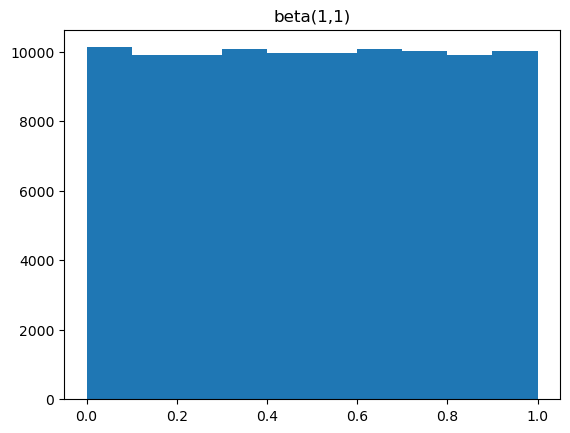

In [5]:
beta1 = torch.distributions.beta.Beta(1,1)
samples1 = [beta1.sample() for _ in range(100_000)]
plt.hist(samples1, range=[0, 1], bins=10)
plt.title('beta(1,1)')
plt.show()

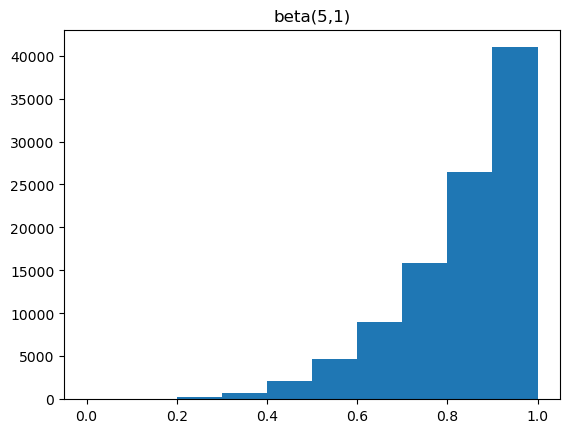

In [9]:
beta2 = torch.distributions.beta.Beta(5,1)
samples2 = [beta2.sample() for _ in range(100_000)]
plt.hist(samples2, range=[0,1], bins=10)
plt.title('beta(5,1)')
plt.show()

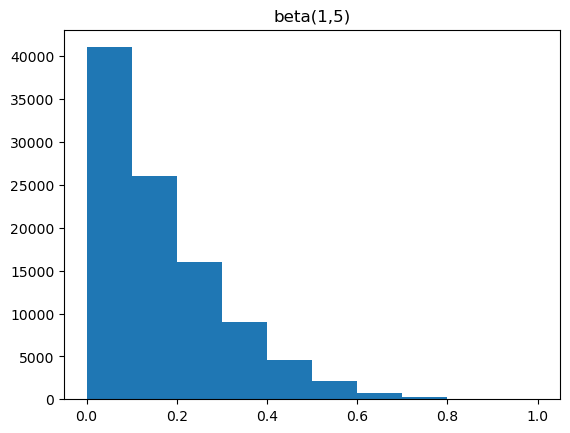

In [8]:
beta3 = torch.distributions.beta.Beta(1,5)
samples3 = [beta3.sample() for _ in range(100_000)]
plt.hist(samples3, range=[0,1], bins=10)
plt.title('beta(1,5)')
plt.show()

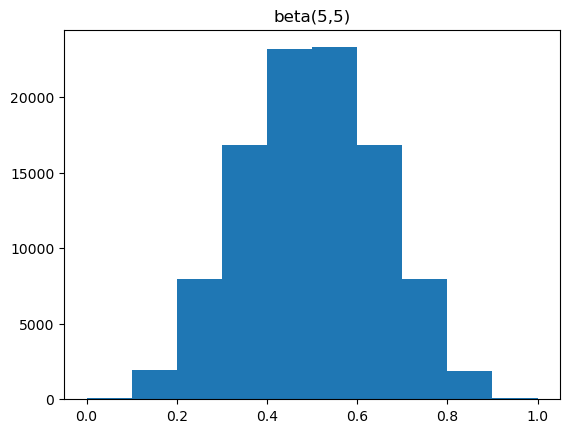

In [10]:
beta4 = torch.distributions.beta.Beta(5,5)
samples4 = [beta4.sample() for _ in range(100_000)]
plt.hist(samples4, range=[0,1], bins=10)
plt.title('beta(5,5)')
plt.show()

## Set up BanditEnv and run episodes

In [11]:
from multi_armed_bandit import BanditEnv

bandit_payout = [0.1, 0.15, 0.3]
bandit_reward = [4, 3, 1]
bandit_env = BanditEnv(bandit_payout, bandit_reward)

In [14]:
n_episode = 100_000
n_action = len(bandit_payout)
action_count = [0 for _ in range(n_action)]
action_total_reward = [0 for _ in range(n_action)]
action_avg_reward = [[] for action in range(n_action)]

In [13]:
def random_policy():
    action = torch.multinomial(torch.ones(n_action), 1).item()
    return action

In [16]:
for episode in range(n_episode):
    action = random_policy()
    reword = bandit_env.step(action)
    action_count[action] += 1
    action_total_reward[action] += reward
    for a in range(n_action):
        if action_count[a]:
            action_avg_reward[a].append(
                action_total_reward[a]/action_count[a])
        else:
            action_avg_reward[a].append(0)

TypeError: unsupported operand type(s) for +=: 'int' and 'list'

In [19]:
l = []
l.append(1/2)
l.append(2/3)
l

[0.5, 0.6666666666666666]

[1, 2]